<a href="https://colab.research.google.com/github/MrBendji/Reducing-Churn-in-Telecom-A-Data-Driven-Approach/blob/master/Customer_Churn_Prediction_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducing Churn in Telecom: A Data-Driven Approach

**Problem Statement:**

In the highly competitive telecommunications industry, customer churn remains a significant challenge for service providers. Churn, defined as the rate at which customers discontinue their services, not only results in revenue loss but also imposes additional costs associated with acquiring new customers to replace those who leave.



**Objectives:**

  The objective of this project is to develop a predictive model that can effectively identify customers at risk of churning (leaving) a telecommunications company, using the dataset obtained from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data). By leveraging historical customer data, we aim to create a model that provides actionable insights for reducing customer churn and improving customer retention strategies.


In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns


In [2]:
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The attributes have the following meaning:
    

- **CustomerID:** Unique identifier for each customer.
- **Gender:** Indicates whether the customer is male or female.
- **SeniorCitizen:** Indicates whether the customer is a senior citizen (1 for yes, 0 for no).
- **Partner:** Indicates whether the customer has a partner (Yes or No).
- **Dependents:** Indicates whether the customer has dependents (Yes or No).
- **Tenure:** The number of months the customer has been with the company.
- **PhoneService:** Indicates whether the customer has a phone service (Yes or No).
- **MultipleLines:** Indicates whether the customer has multiple phone lines (Yes, No, or No phone service).
- **InternetService:** Specifies the customer's internet service provider (DSL, Fiber optic, or No).
- **OnlineSecurity:** Indicates whether the customer has online security (Yes, No, or No internet service).
- **OnlineBackup:** Indicates whether the customer has online backup (Yes, No, or No internet service).
- **DeviceProtection:** Indicates whether the customer has device protection (Yes, No, or No internet service).
- **TechSupport:** Indicates whether the customer has tech support (Yes, No, or No internet service).
- **StreamingTV:** Indicates whether the customer has streaming TV (Yes, No, or No internet service).
- **StreamingMovies:** Indicates whether the customer has streaming movies (Yes, No, or No internet service).
- **Contract:** Specifies the contract term of the customer (Month-to-month, One year, Two years).
- **PaperlessBilling:** Indicates whether the customer has paperless billing (Yes or No).
- **PaymentMethod:** Specifies the customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- **MonthlyCharges:** The monthly amount charged to the customer.
- **TotalCharges:** The total amount charged to the customer.
- **Churn:** Indicates whether the customer has churned (left the service) or not (Yes or No).

In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- The dataset has too many features with text data and are probably categorical features!
- **Total Charges** is a feature with numerical values but are stored in string datatype. First, we will convert this column into float.

In [6]:
data['TotalCharges'] = data.TotalCharges.astype(float)

ValueError: ignored

In [7]:
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


To convert **TotalCharges**, we noticed that this attribute actually contained string data, which turned out to be an empty string. So we could put zeros where there are empty strings, but I don't see why we should put zeros when **MonthlyCharges** has values greater than zero. So the best thing to do would be to delete these instances and convert TotalCharges back to a numeric value.

In [8]:
df = data[data['TotalCharges']!=' ']

In [9]:
df['TotalCharges'] = df.TotalCharges.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# 1. Exploratory Data Analysis

### Examination of the target column

In [ ]:
df.Churn.value_counts()

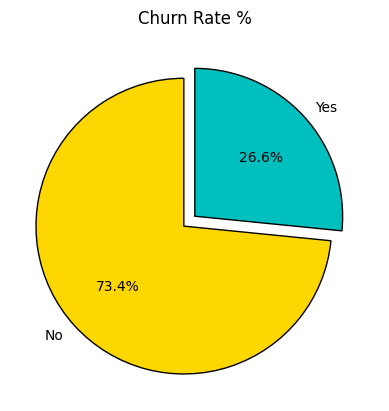

In [10]:
l = list(df['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
colors = ['gold','c']

plt.pie(circle,labels = ['No','Yes'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn Rate %');

In our data, 73% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives.

### histograms of continuous variables

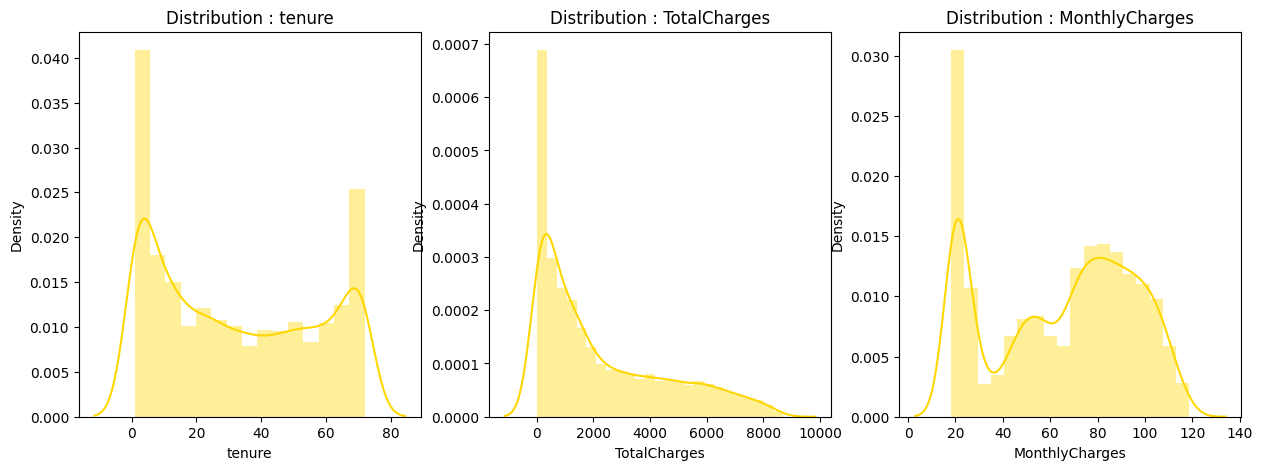

In [11]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
numerical_features = ['tenure', 'TotalCharges', 'MonthlyCharges']
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

### Qualitative variables

In [12]:
for col in df.select_dtypes('object'):
    print(f'{col :-<30} {df[col].unique()}')

customerID-------------------- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender------------------------ ['Female' 'Male']
Partner----------------------- ['Yes' 'No']
Dependents-------------------- ['No' 'Yes']
PhoneService------------------ ['No' 'Yes']
MultipleLines----------------- ['No phone service' 'No' 'Yes']
InternetService--------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity---------------- ['No' 'Yes' 'No internet service']
OnlineBackup------------------ ['Yes' 'No' 'No internet service']
DeviceProtection-------------- ['No' 'Yes' 'No internet service']
TechSupport------------------- ['No' 'Yes' 'No internet service']
StreamingTV------------------- ['No' 'Yes' 'No internet service']
StreamingMovies--------------- ['No' 'Yes' 'No internet service']
Contract---------------------- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling-------------- ['Yes' 'No']
PaymentMethod----------------- ['Electronic check' 'Mailed check' 'Ban

The **customerID** column is merely a unique identifier for each customer and does not contain any meaningful information relevant to your analysis, it can be safely removed.

In [13]:
data_clean = df.drop('customerID', axis=1)

## Looking for Relationships

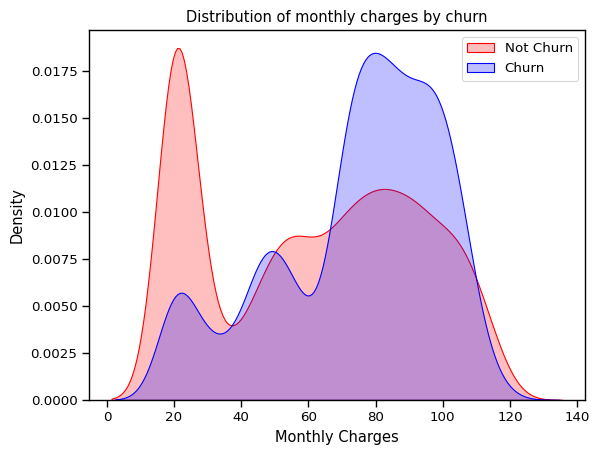

In [14]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data_clean.MonthlyCharges[(data_clean["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data_clean.MonthlyCharges[(data_clean["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

- Clients with higher MonthlyCharges are  more likely to churn.

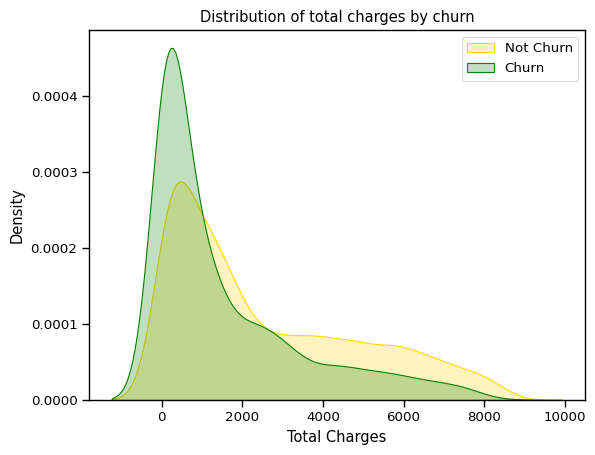

In [15]:
ax = sns.kdeplot(data_clean.TotalCharges[(data_clean["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(data_clean.TotalCharges[(data_clean["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

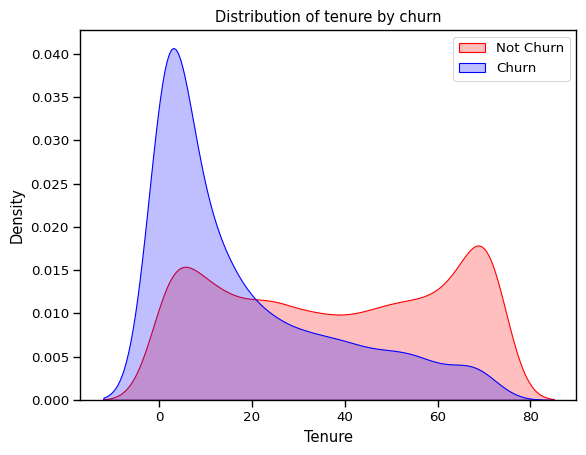

In [16]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data_clean.tenure[(data_clean["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data_clean.tenure[(data_clean["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of tenure by churn');



   - New customers are more likely to churn



In [17]:
custom_info = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
services = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
payments = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

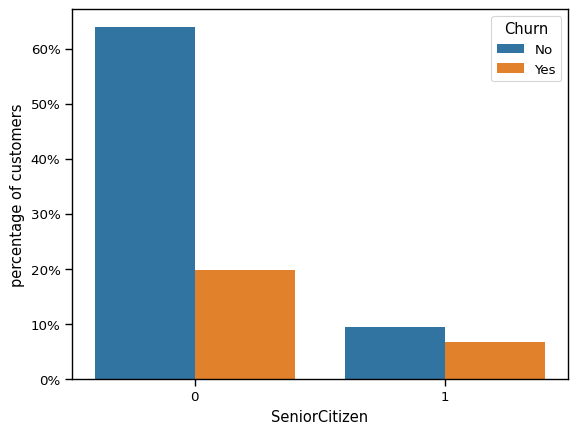

In [18]:
def barplot_percentages(feature, data=df, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen", data=data_clean)

- It can be observed that the fraction of senior citizen is very less.
- Most of the senior citizens churn.

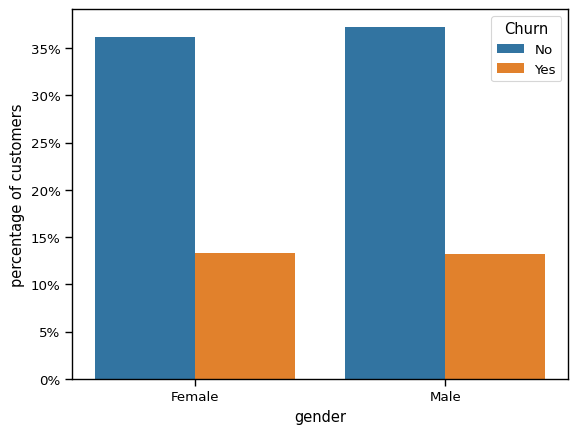

In [19]:
barplot_percentages("gender", data=data_clean)

- Customer churning for male & female customers is very similar to each other!

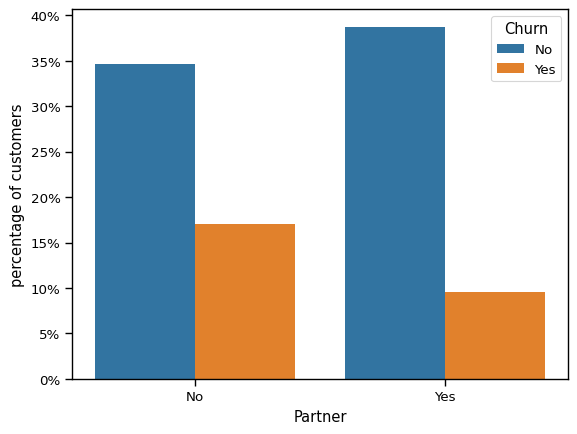

In [20]:
barplot_percentages("Partner", data=data_clean)

- Customers that doesn't have partners are more likely to churn


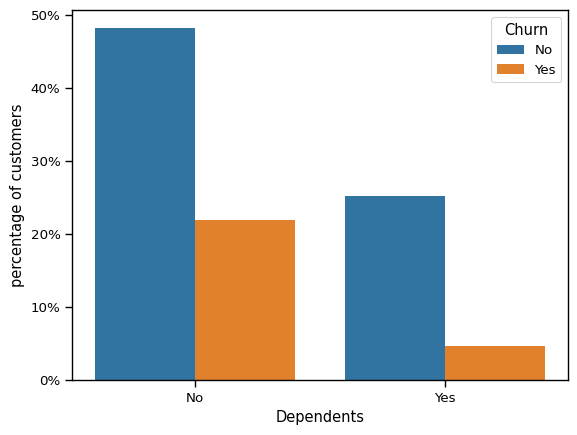

In [21]:
barplot_percentages("Dependents", data=data_clean)

- Churning is high for the customers that don't have Dependents with them!

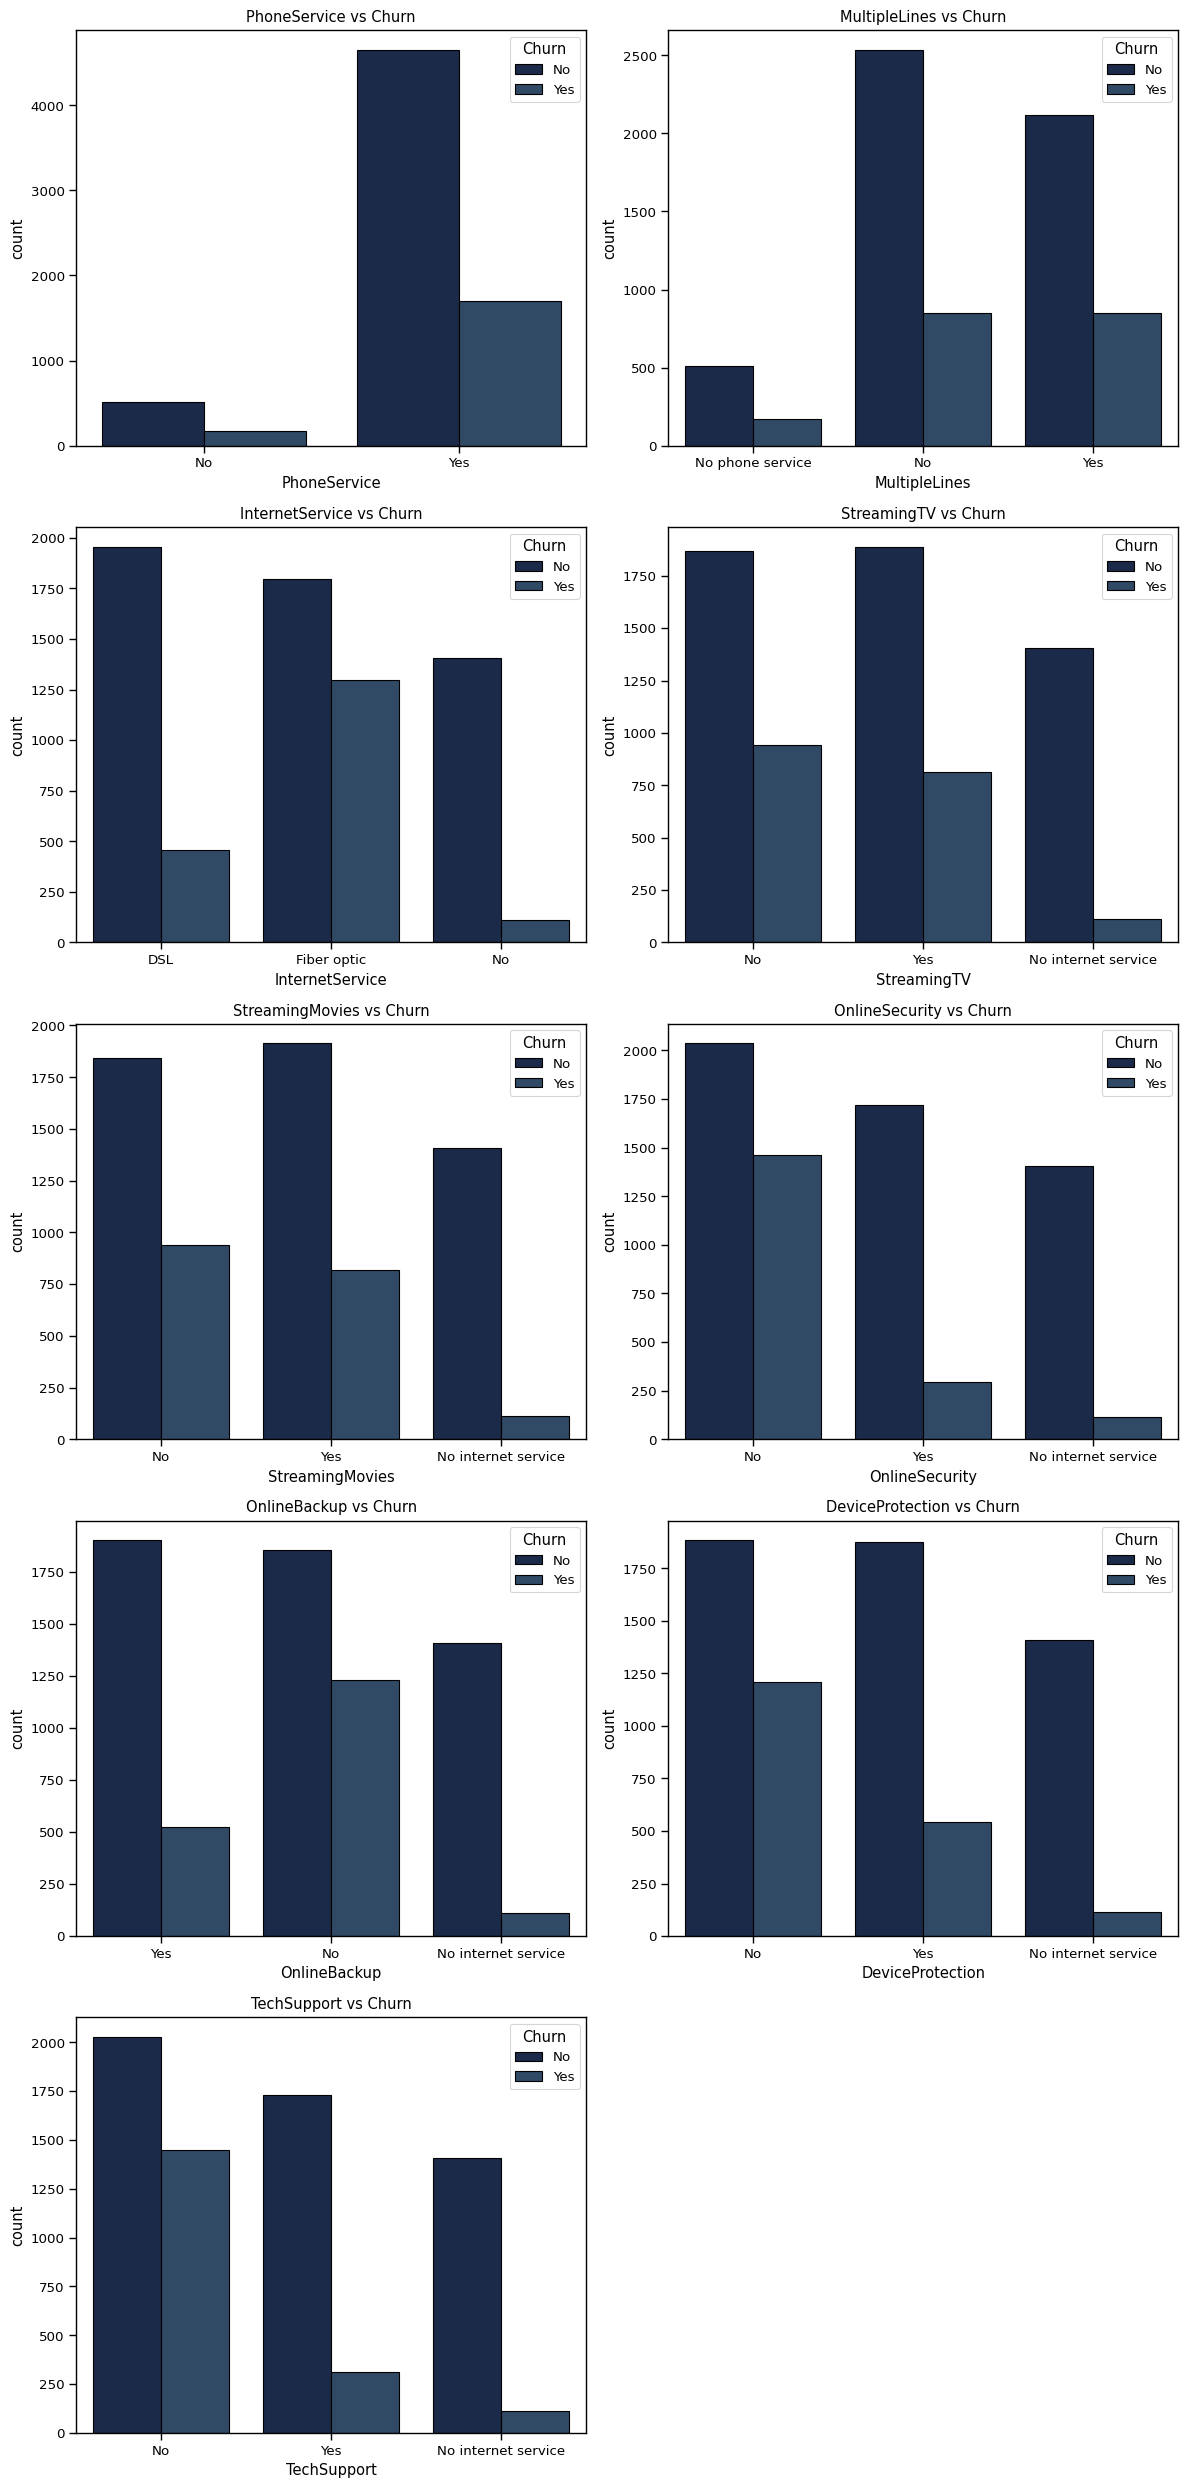

In [22]:
custom_palette = ['#142850', '#27496D', '#0C7B93', '#00A8CC', '#00CED1', '#72EFDD', '#A9F0D1', '#CAF270', '#FFD700']

num_rows = (len(services) + 1) // 2  # Two figures per row
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

axes = axes.flatten()

for i, service in enumerate(services):
    ax = sns.countplot(x=service, data=data_clean, hue="Churn", palette=custom_palette, edgecolor='black', ax=axes[i])
    ax.set_title(f'{service} vs Churn')

for i in range(len(services), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

- For **PhoneService**, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.
- In case of **MultipleLines**, churn rate in when the Multiplelines are present or not is the same.
- A high number of customers have displayed their resistance towards the use of **Fiber optic** cables for providing the **InternetService**. On the contrary, from the above graph, customers prefer using **DSL** for their InternetService!
- **StreamingTV** and **StreamingMovies** display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned.
- When it comes down to satisfy the customers, services like **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** & **TechSupport** are crucial from the above visualizations!


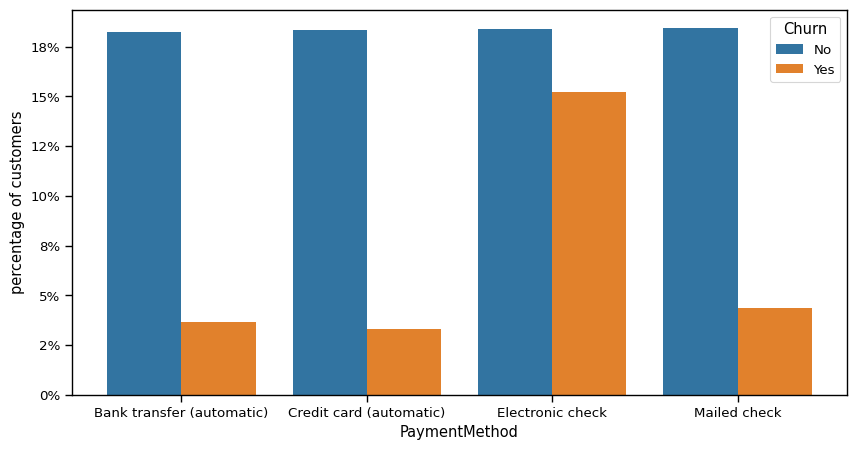

In [23]:
plt.figure(figsize=(10, 5))
barplot_percentages("PaymentMethod", data=data_clean)

In [24]:
data_clean.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

- The preferred payment method is Electronic check. This method also has a very high churn rate

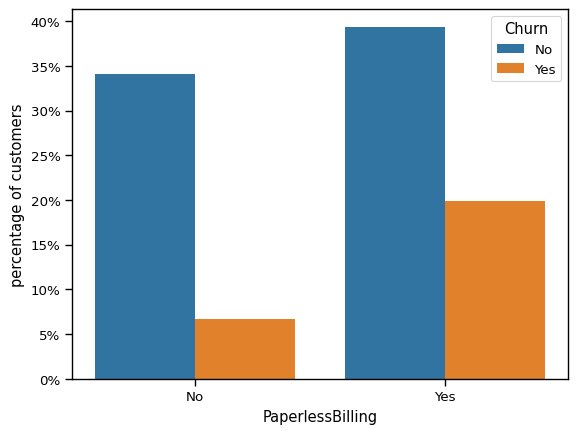

In [25]:
barplot_percentages("PaperlessBilling", data=data_clean)

- PaperlessBilling does not seemed to be appreciated by the customers!

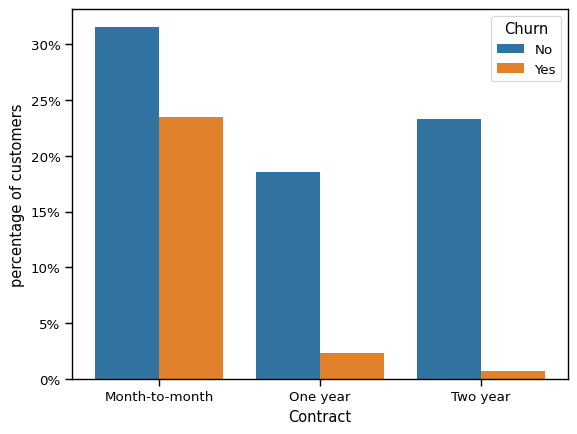

In [26]:
barplot_percentages("Contract", data=data_clean)

- Short term contracts have higher churn rates

## Correlations between Features and Target  & Preprocessing

In [27]:
data_clean1 = data_clean.copy()

In [28]:
data_clean1 = pd.get_dummies(data_clean1, drop_first=True)

In [29]:
data_clean1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [30]:
columns_rename = {'gender_Male':"Gender", "Partner_Yes":"Partner", "Dependents_Yes":"Dependents",
                  'PhoneService_Yes':'PhoneService', 'MultipleLines_Yes':'MultipleLines',
                  'InternetService_No':'InternetService', 'OnlineSecurity_Yes': 'OnlineSecurity',
                 "OnlineBackup_Yes":"OnlineBackup", 'DeviceProtection_Yes':"DeviceProtection",
                 "TechSupport_Yes":"TechSupport","StreamingTV_Yes":"StreamingTV",
                  "StreamingMovies_Yes": 'StreamingMovies',
                  "PaperlessBilling_Yes":"PaperlessBilling", 'Churn_Yes':"Churn" } #Male:1

In [31]:
final = data_clean1.rename(columns=columns_rename)

In [32]:
correlations_data = final.corr()['Churn'].sort_values()

In [33]:
correlations_data

tenure                                  -0.354049
Contract_Two year                       -0.301552
OnlineSecurity_No internet service      -0.227578
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
TechSupport_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
OnlineBackup_No internet service        -0.227578
InternetService                         -0.227578
TotalCharges                            -0.199484
Contract_One year                       -0.178225
OnlineSecurity                          -0.171270
TechSupport                             -0.164716
Dependents                              -0.163128
Partner                                 -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup                            -0.082307
DeviceProtection                        -0.066193
MultipleLines_No phone service          -0.011691


We notified that our correaltions aren't strong, this suggest that there may not be strong linear relationships between individual features and the `Churn` variable. Therefore, we have opted for non-linear models as they are better equipped to capture the potential non-linear complexities in the data and improve predictive accuracy.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
X = final.drop(columns = ['Churn'])
y = final['Churn'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42, stratify=y)

In [37]:
scaler= StandardScaler()
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Machine Learning Modeling

We will compare  different machine learning models using the great [Scikit-Learn library](http://scikit-learn.org/stable/).

Our dataset is imbalanced, with `Churn` representing only 27% of the data, while `Not-Churn` makes up 73%. Given this imbalance, we've opted for the F1 score as our main evaluation metric. This choice is because in imbalanced datasets, traditional accuracy can be misleading. The F1 score considers both precision and recall, making it more suitable for assessing our model's performance, especially in addressing the minority class (`Churn`) effectively.

We use cross-validation to ensure a robust evaluation of our model's performance on unseen data, guarding against overfitting and providing a more reliable assessment of its generalization capabilities.

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [53]:
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(X_train, y_train, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""

    cv_scores = cross_val_score(model, X_train, y_train, cv = 10, scoring="f1", n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')

    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name,
                                                           'cv_mean': cv_scores.mean(),
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [54]:
model_results = cv_model(X_train, y_train,
                          DecisionTreeClassifier(random_state=10),
                              'DT', model_results)

10 Fold CV Score: 0.49954 with std: 0.02462


In [64]:
model_results = cv_model(X_train, y_train,
                          GradientBoostingClassifier(random_state=10),
                              'GD', model_results)

10 Fold CV Score: 0.59043 with std: 0.038


In [55]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(X_train, y_train,
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.54904 with std: 0.03339

KNN with 10 neighbors

10 Fold CV Score: 0.54983 with std: 0.02497

KNN with 20 neighbors

10 Fold CV Score: 0.57696 with std: 0.03867


In [56]:
model_results = cv_model(X_train, y_train,
                          SVC(),
                              'SVC', model_results)

10 Fold CV Score: 0.57458 with std: 0.0351


In [57]:
model_results = cv_model(X_train, y_train,
                          RandomForestClassifier(random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.56922 with std: 0.03369


In [58]:
model_results = cv_model(X_train, y_train,
                          AdaBoostClassifier(random_state=10),
                              'AD', model_results)

10 Fold CV Score: 0.59195 with std: 0.0307


## Comparing Model Performance

With the modeling results in a dataframe, we can plot them to see which model does the best.

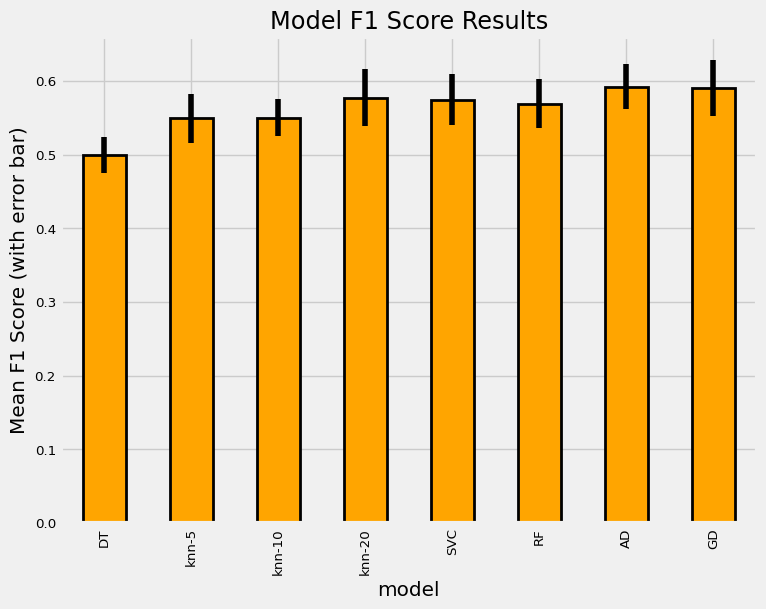

In [65]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

The `AdaBoostClassifier` performs the best followed by the  Gradient boosting classifier. I have to admit that this is not the most fair comparison because we are using mostly the default hyperparameters.

From here, I am going to concentrate on optimizing the best model using hyperparamter tuning. Given the results here, I will concentrate on using the `AdaBoostClassifier`.

# Model Optimization

Model optimization is the process of extracting the best performance from a machine learning model by tuning the hyperparameters through cross-validation.

In [66]:
parameters = {
    'n_estimators': range(50, 500),
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
}

In [68]:
from sklearn.model_selection import RandomizedSearchCV

ada = AdaBoostClassifier(random_state=42)
ada_search = RandomizedSearchCV(ada, parameters, n_iter=25, cv=10, scoring='f1', n_jobs = -1, verbose = 1,
                               return_train_score = True,
                               random_state=42)
ada_search.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0],
                                        'n_estimators': range(50, 500)},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=1)

In [76]:
best_model = ada_search.best_estimator_

In [84]:
model_results = cv_model(X_train, y_train,
                          best_model,
                              'RandomAda', model_results)

10 Fold CV Score: 0.59153 with std: 0.02989


In [77]:
best_model

AdaBoostClassifier(learning_rate=0.1, n_estimators=390, random_state=42)

In our approach, we used `RandomizedSearchCV` initially to efficiently explore a wide range of hyperparameters. This is followed by `GridSearchCV`, which focuses on refining the best hyperparameters identified in the first step. This two-step approach balances exploration and precision, resulting in a well-optimized model.

In [80]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = AdaBoostClassifier(learning_rate=0.1,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 10,
                           scoring = 'f1', verbose = 1,
                           n_jobs = -1, return_train_score = True)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(learning_rate=0.1, random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='f1', verbose=1)

In [81]:
results = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending = False)

results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
12,5.637026,0.641644,0.251343,0.015043,700,{'n_estimators': 700},0.578723,0.573840,0.559322,0.672414,0.625000,0.605505,0.576271,0.604082,0.563025,0.608333,0.596651,0.032550,1,0.618353,0.613346,0.615747,0.608325,0.610346,0.607834,0.609641,0.618114,0.617772,0.611687,0.613117,0.003920
9,4.187935,0.511680,0.227391,0.050631,550,{'n_estimators': 550},0.570213,0.571429,0.566667,0.666667,0.630705,0.605505,0.578723,0.606557,0.556962,0.608333,0.596176,0.032409,2,0.612032,0.614002,0.614218,0.608408,0.606581,0.607379,0.608038,0.616105,0.613497,0.610009,0.611027,0.003191
13,5.722897,0.665300,0.276468,0.014763,750,{'n_estimators': 750},0.576271,0.573840,0.559322,0.672414,0.625000,0.602740,0.576271,0.604082,0.563025,0.608333,0.596130,0.032627,3,0.618062,0.614657,0.615167,0.607955,0.609687,0.607917,0.612187,0.619692,0.615891,0.612053,0.613327,0.003860
14,6.136500,0.614232,0.330129,0.083032,800,{'n_estimators': 800},0.576271,0.573840,0.561702,0.672414,0.619247,0.605505,0.573840,0.604082,0.565401,0.608333,0.596063,0.031892,4,0.618353,0.614657,0.616109,0.607871,0.610057,0.608655,0.614077,0.618537,0.618624,0.612706,0.613965,0.003862
10,4.503354,0.536028,0.250154,0.072663,600,{'n_estimators': 600},0.578723,0.571429,0.556962,0.666667,0.630705,0.602740,0.576271,0.606557,0.560669,0.608333,0.595906,0.032513,5,0.614077,0.613056,0.616477,0.608408,0.606956,0.608408,0.608778,0.615241,0.615240,0.610665,0.611731,0.003304


In [85]:
# Select the best model
final_model = grid_search.best_estimator_

final_model

AdaBoostClassifier(learning_rate=0.1, n_estimators=700, random_state=42)

In [86]:
model_results = cv_model(X_train, y_train,
                          final_model,
                              'Final', model_results)

10 Fold CV Score: 0.59665 with std: 0.03255


# Evaluate Final Model on the Test Set

In [90]:
final_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=700, random_state=42)

In [91]:
y_pred = final_model.predict(X_test)

## Feature Importances

With a tree-based model, we can look at the feature importances which show a relative ranking of the usefulness of features in the model.

If we want to view the feature importances, we'll have to train a model on the whole training set. Cross validation does not return the feature importances.

In [92]:
features = X.columns
# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': final_model.feature_importances_})
# Show the top 10 most important
feature_results = feature_importances.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,TotalCharges,0.318571
1,MonthlyCharges,0.280000
2,tenure,0.148571
3,MultipleLines,0.032857
4,TechSupport,0.024286
5,Contract_One year,0.020000
6,MultipleLines_No phone service,0.020000
7,StreamingTV,0.017143
8,OnlineSecurity,0.017143
9,InternetService_Fiber optic,0.014286


The `MonthlyCharges`, `TotalCharges`, `tenure` are the three most important features.

:Let's graph the feature importances to compare visually.

In [93]:
def plot_feature_importances(df, n = 10):
    """Plots n most important features.
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".

        n (int): Number of most important features to plot. Default is 15.



    """
    plt.style.use('fivethirtyeight')

    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)

    # Normalize the feature importances to add up to one
    #df['importance_normalized'] = df['importance']

    plt.rcParams['font.size'] = 12

    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance',
                            x = 'feature', color = 'darkgreen',
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Importance', size = 18); plt.ylabel('');
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()



    return df

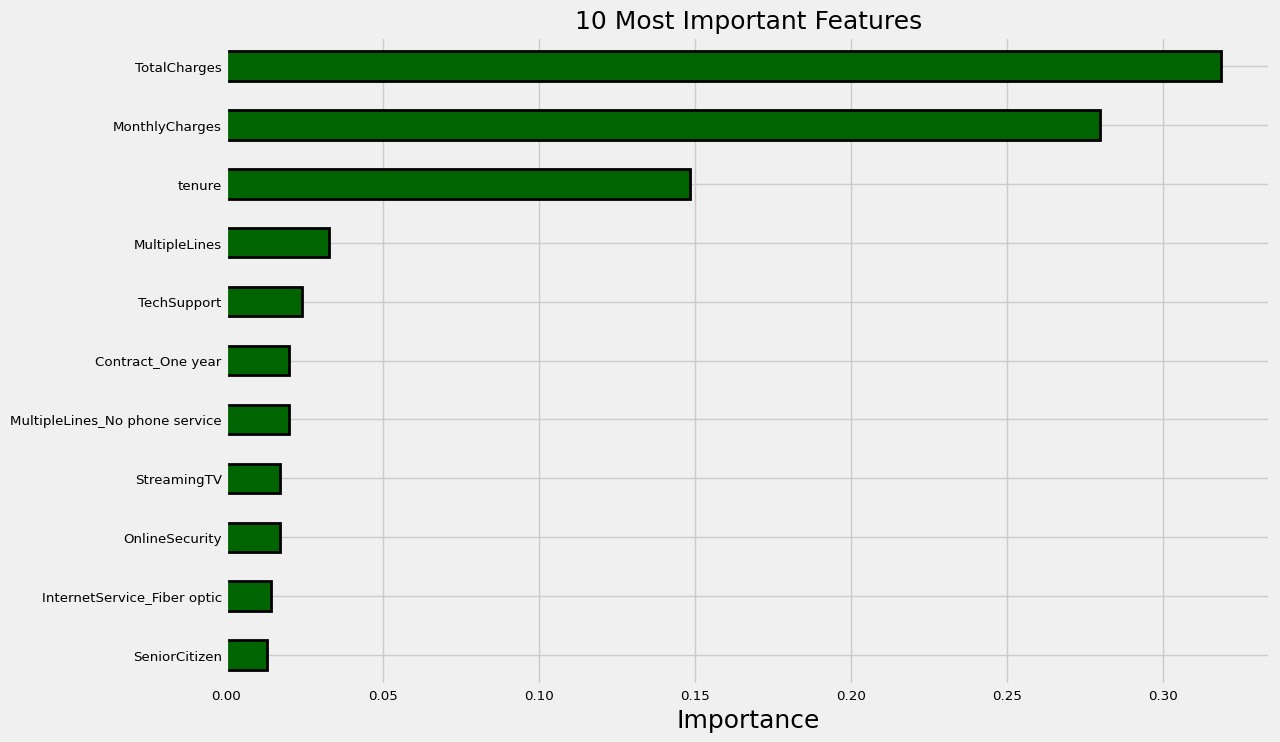

In [94]:
_ = plot_feature_importances(feature_results)

# Investigate Predictions

Let's use our predictions to plot a confusion matrix. This lets us see where the model is "confused" by showing the differences between predictions and true values. The code for this confusion matrix is adapted from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [95]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 11)
    plt.xlabel('Predicted label', size = 11)

Confusion matrix, without normalization
[[1397  152]
 [ 279  282]]


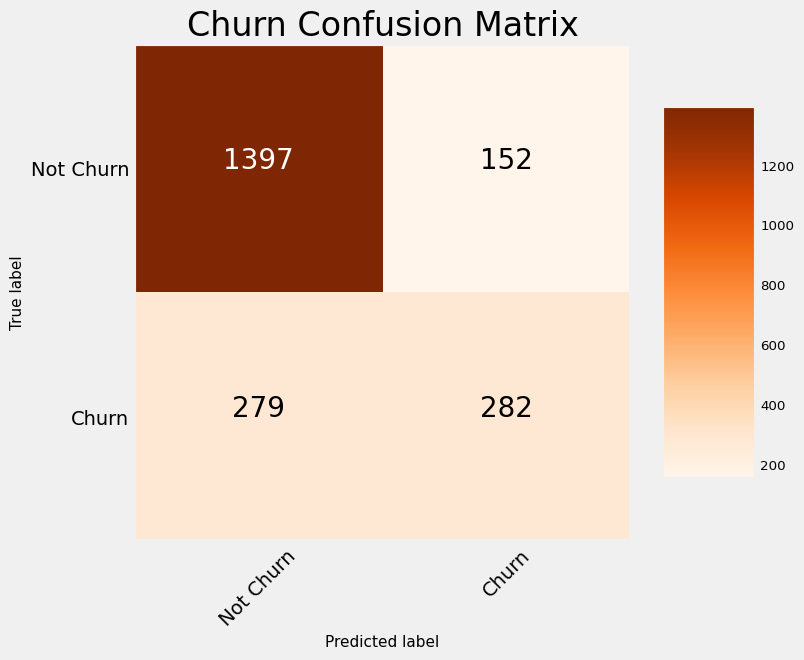

In [96]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, classes = ['Not Churn', 'Churn'],
                      title = 'Churn Confusion Matrix')

Normalized confusion matrix
[[0.90187218 0.09812782]
 [0.4973262  0.5026738 ]]


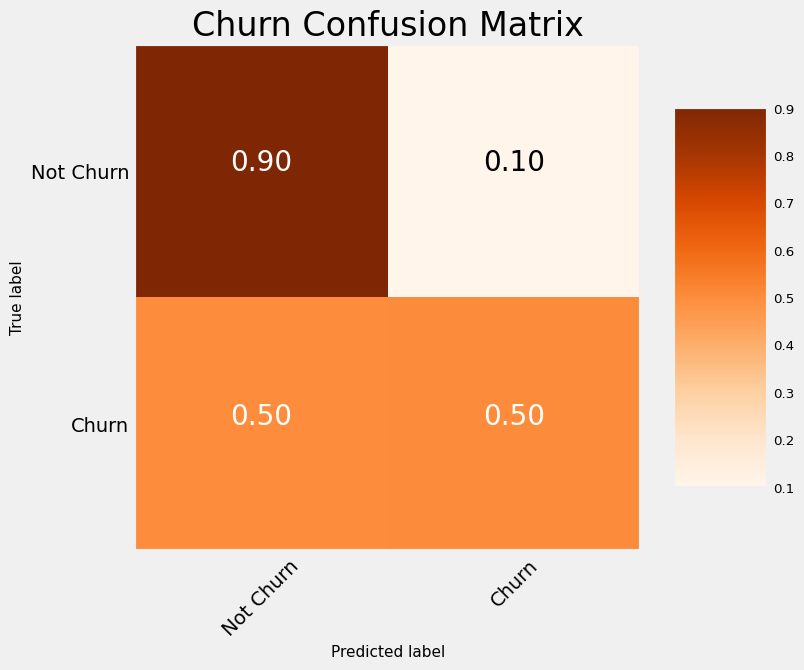

In [97]:
plot_confusion_matrix(cm, classes = ['Not Churn','Churn'],
                      title = 'Churn Confusion Matrix', normalize = True)

Now we can see that our model really does not do that well for  `Churn(1)` class. It only correctly identifies 5O% of the `Churn(1)` , classifying more of them as `Not Churn(0)`. Overall, these results show that imbalanced classification problems with relatively few observations are very difficult. There are some methods we can take to try and counter this such as oversampling or training multiple models on different sections of the data, but the most effective method may be to __gather more data__.

# Conclusions

In this notebook, we covered crucial concepts in the machine learning pipeline:

* Understand the problem
* Exploratory Data Analysis
    * Deal with data issues
* Model Selection
    * Try many different models to see which one is most promising
* Model Optimization
    * Choose the best performing model and tune
* Implementing best model
* Investigate predictions
    * Identify model shortcomings

Based on our exploration in this notebook, we can confidently conclude that we have the potential to create a predictive model that accurately infers the likelihood of customer churn. Our analysis has revealed that key factors, including `MonthlyCharges,` `TotalCharges,` and `tenure,` significantly influence the prediction of churn. These features are instrumental in understanding and predicting customer behavior.

Our final model is not extremely accurate. There might be ways to improve performance, but overall, we might not have enough data to achieve exceptional metrics.


## Next Steps

Although we tried many possible approaches, there are still some methods that we did not implement but might prove useful:

* Further feature selection: we probably do not need to retain all of the features to get the same performance
* [Oversampling the minority class](https://imbalanced-learn.org/stable/over_sampling.html) / undersampling the majority class: an advanced techinque that might improve performance
